In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras.datasets import mnist

In [ ]:
(train_images, _), (_, _) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255.0

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu')
])

In [ ]:
layer_indices = [0, 2, 4]
num_layers = len(layer_indices)

1/1 [==============================] - 0s 48ms/step


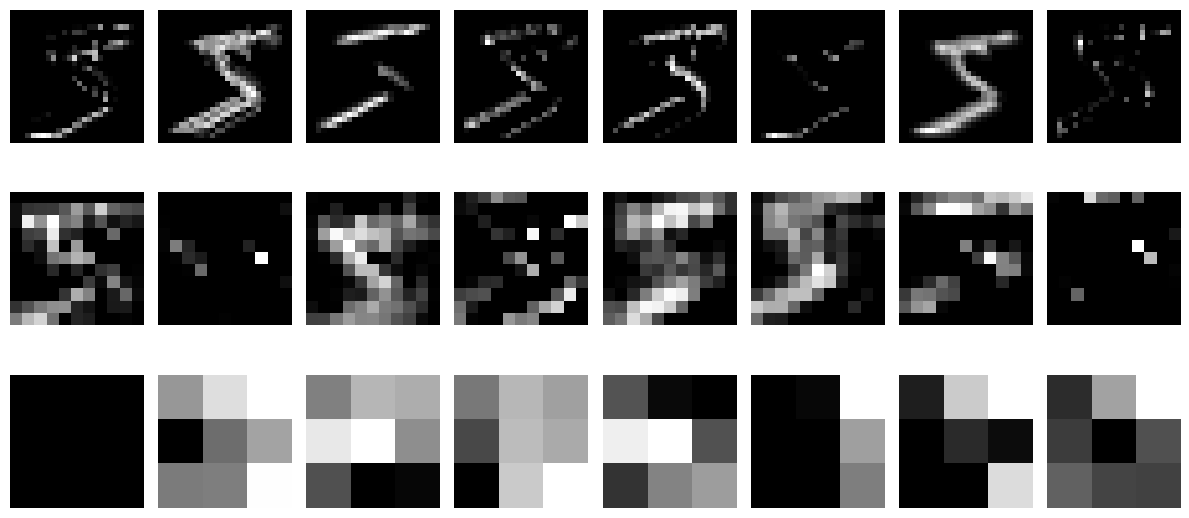

In [ ]:
fig, axs = plt.subplots(num_layers, 8, figsize=(12, num_layers*2))

for layer_index, layer_idx in enumerate(layer_indices):
    feature_maps_model = models.Model(inputs=model.inputs, outputs=model.layers[layer_idx].output)
    feature_maps = feature_maps_model.predict(train_images[:1])

    for i, ax in enumerate(axs[layer_index]):
        ax.imshow(feature_maps[0, :, :, i], cmap='gray')
        ax.axis('off')

plt.tight_layout()
plt.show()